In [88]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [89]:
data = pd.read_csv('content/RatechartDetails.csv')

In [90]:
data.head()

,ID,FAT,SNF,Rate,ChartId
0,1,3.0,7.5,14.4,1
1,2,3.0,7.6,15.4,1
2,3,3.0,7.7,16.4,1
3,4,3.0,7.8,17.4,1
4,5,3.0,7.9,18.4,1


In [91]:
data.shape

(41689, 5)

In [92]:
#check missing values
print("Missing Values: ")
print(data.isnull().sum())

Missing Values: 
ID         0
FAT        0
SNF        0
Rate       0
ChartId    0
dtype: int64


In [93]:
print("Datatype: ")
print(data.dtypes)

Datatype: 
ID           int64
FAT        float64
SNF        float64
Rate       float64
ChartId      int64
dtype: object


In [94]:
# Set 'date' column as the index
# data.set_index('ID', inplace=True)

In [95]:
data.head()

,ID,FAT,SNF,Rate,ChartId
0,1,3.0,7.5,14.4,1
1,2,3.0,7.6,15.4,1
2,3,3.0,7.7,16.4,1
3,4,3.0,7.8,17.4,1
4,5,3.0,7.9,18.4,1


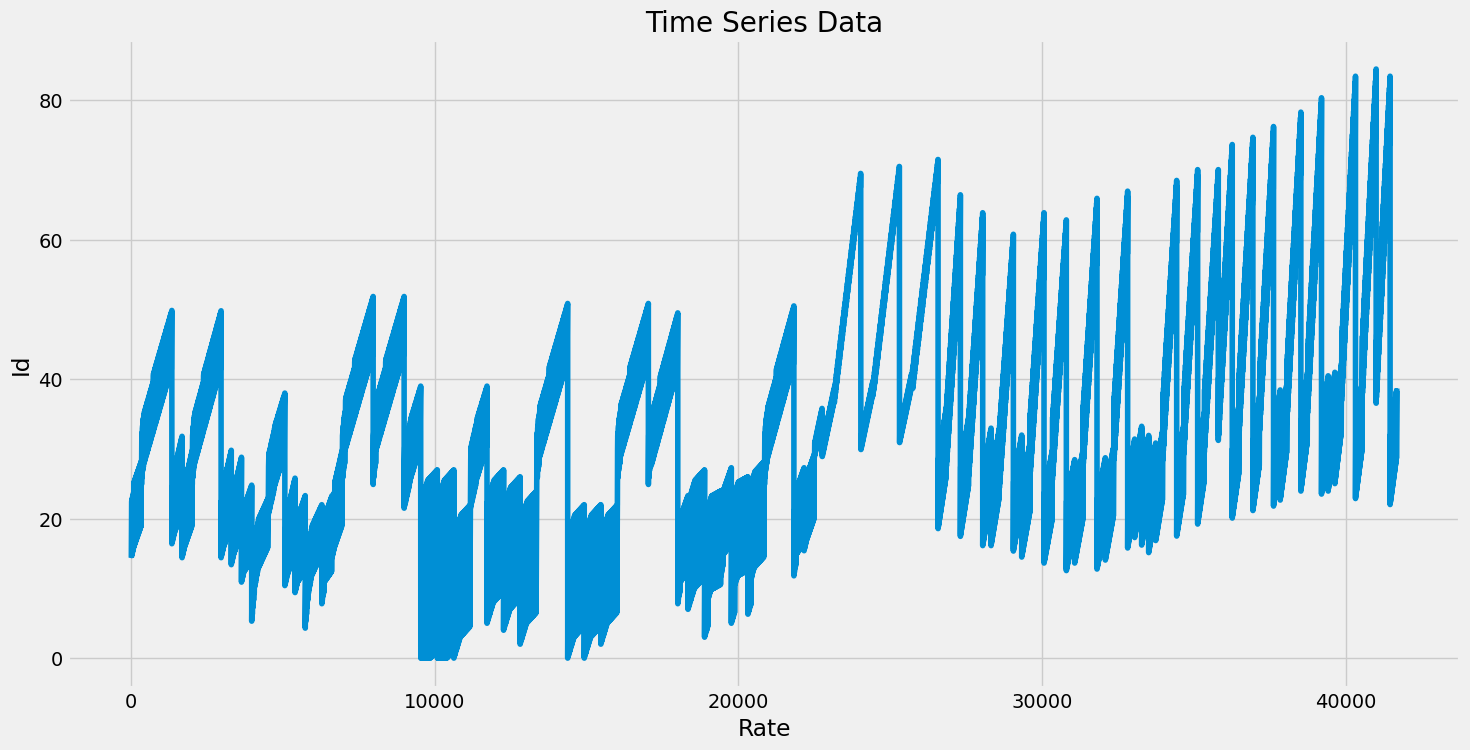

In [96]:
# Plot the time series data
plt.figure(figsize=(16, 8))
plt.plot(data['Rate'])
plt.title('Time Series Data')
plt.xlabel('Rate')
plt.ylabel('Id')
plt.show()

In [97]:
df = pd.DataFrame(data)

In [98]:
# Define input features (X) and target variable (y)
X = df[['FAT', 'SNF', 'Rate']]
y = df['Rate']  # Assuming 'Rate' is the target variable for prediction

In [99]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [102]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 3.860000241814347e-28


In [107]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted for training data
plt.figure(figsize=(10, 5))
plt.scatter(X_train,  color="blue", label="Training Data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Training)")
plt.legend()
plt.grid(True)
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 1000x500 with 0 Axes>

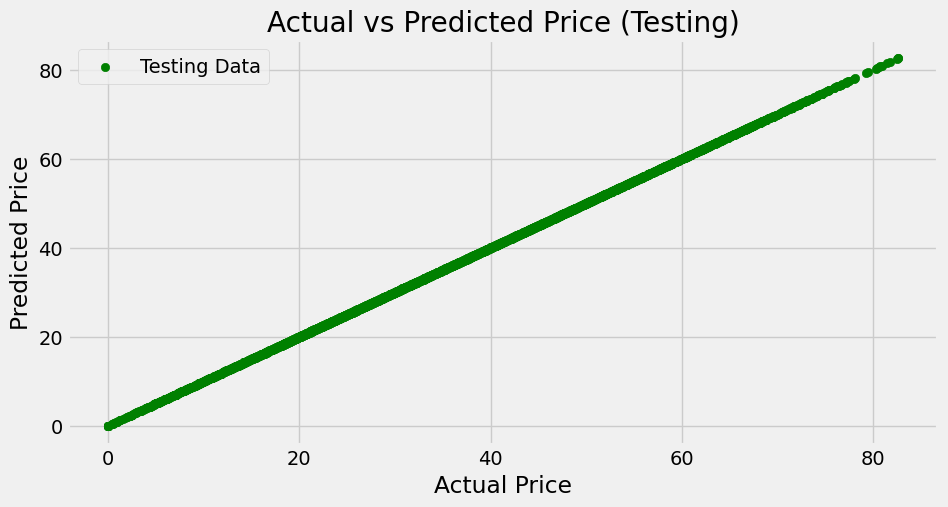

In [105]:
# Plotting actual vs predicted for testing data
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color="green", label="Testing Data")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price (Testing)")
plt.legend()
plt.grid(True)
plt.show()

In [110]:
# Assuming you have new data for which you want to make predictions
new_data = {
    'FAT': [3.2, 3.3],
    'SNF': [7.6, 7.7]
}
new_df = pd.DataFrame(new_data)

# Make predictions
predicted_prices = model.predict(new_df[['FAT', 'SNF']])

# Update new_df with predicted prices
new_df['Predicted_Price'] = predicted_prices

print("\nFuture Forecasts:")
print(new_df)


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Rate
